# Main goal for the analysis

The main objective  of the analysis is to build a predictive model which is very accurate to predict if a patient is suffering from Hypothyroid or not.
Using various test done at the hospital, one will be be able to predict if a patient is suffering for the illness or not.

# **Metric of success**

This analysis will be considered a success when we are able to apply Various ensemble classifers and SVM classifer to the dataset in order to identify the best prediction model that has the highest accuracy level. The baseline model should be identified and compared to other classiffication models. The prediction model selected for this research question should not suffer from any instances of overfitting or underfitting.

## Understanding the context


Hypothyroidism is a condition in which the thyroid gland doesn't produce enough thyroid hormone. Thyroid glands is a butterfly shaped glands under the adam's apple.
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain

Nairobi Hospital conducted a free clinical camp to carry out a hypothroidism test, the clinical officers focused on thyroid patient to get the necessary data.

The patients went through 18 tests, to help doctors determine if the patient have the condition or not.

From the data collected by the clinical officers during the camp, it would be very useful to us to build a model that is able to classify the patient as a sick or not sick

# Recording the Experimental Design

To conduct the analysis successfully , the following steps will be followed:


1.   Loading the dataset
2.   Data understanding

1.   Data cleaning and manipulation
2.   Exploratory Data analysis

1.   Predictive analysis
2.   Implementing the solution







# **Data relevance**

The data was collected by clinical officers during a clinical camp held in Nairobi Hospital.
some of the data collected included ;

age, , on_thyroxine ,query_on_thyroxine	,on_antithyroid_medication,	thyroid_surgery,	query_hypothyroid,	query_hyperthyroid,	pregnant,	sick,	tumor,	lithium	goitre,	TSH_measured,		T3_measured,		TT4_measured,		T4U_measured,		FTI_measured,		TBG_measured,	

In [137]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore', '.*do not.*',)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC

# **Data Understanding**

In [ ]:
## import the csv file
data=pd.read_csv('/content/hypothyroid.csv')

In [ ]:
## first few rows of the data
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
## last few rows
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
### the number of columns and rows
data.shape

(3163, 26)

In [ ]:
## the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

All the columns in our data set are object, even the numerical data, hence will need to clean that and convert them into floats and integers

# Data cleaning and manipulation

In [ ]:
### checking for missing values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In the dataset we have missing values, the missing values are labelled with a '?', hence our code above is not able to read that... example some of the patient did not provide their age, other patient did not take some test

In [ ]:
### TBG has anormaly which is a ?  meaning  it is not measured, 
data['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [ ]:
## investigate the number of ? in the column
data[data['TBG']=='?'].count()

status                       2903
age                          2903
sex                          2903
on_thyroxine                 2903
query_on_thyroxine           2903
on_antithyroid_medication    2903
thyroid_surgery              2903
query_hypothyroid            2903
query_hyperthyroid           2903
pregnant                     2903
sick                         2903
tumor                        2903
lithium                      2903
goitre                       2903
TSH_measured                 2903
TSH                          2903
T3_measured                  2903
T3                           2903
TT4_measured                 2903
TT4                          2903
T4U_measured                 2903
T4U                          2903
FTI_measured                 2903
FTI                          2903
TBG_measured                 2903
TBG                          2903
dtype: int64

In [ ]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
## replacing the missing values  with 0 so that we can convert them into floats
col_num=['TBG','T3','T4U','TSH','TT4','FTI','age']
for t in col_num:
  data[['TBG','T3','T4U','TSH','TT4','FTI','age']]=data[col_num].replace('?','0')

In [ ]:
 # converting the necessary objects into float
 data[['TBG','T3','T4U','TSH','TT4','FTI']]=data[['TBG','T3','T4U','TSH','TT4','FTI',]].astype(float)
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   object 
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [ ]:
### replace ? in sex with others
data['sex']=data['sex'].str.replace('?','not provided')

In [ ]:
### converting age into int
data['age']=data['age'].str.replace('?','0')
data['age']=data['age'].astype(int)

In [ ]:
### replace f with false and t with true for better visualization
col=['status','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid',
      'query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U',
      'FTI_measured','FTI','TBG_measured','TBG']
for i in col:
  data=data[col].replace('f','false').replace('t','true').replace('n','no').replace('y','yes')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,false,false,false,false,false,false,false,false,false,false,false,yes,30.0,yes,0.6,yes,15.0,yes,1.48,yes,10.0,no,0.0
1,hypothyroid,15,F,true,false,false,false,false,false,false,false,false,false,false,yes,145.0,yes,1.7,yes,19.0,yes,1.13,yes,17.0,no,0.0
2,hypothyroid,24,M,false,false,false,false,false,false,false,false,false,false,false,yes,0.0,yes,0.2,yes,4.0,yes,1.00,yes,0.0,no,0.0
3,hypothyroid,24,F,false,false,false,false,false,false,false,false,false,false,false,yes,430.0,yes,0.4,yes,6.0,yes,1.04,yes,6.0,no,0.0
4,hypothyroid,77,M,false,false,false,false,false,false,false,false,false,false,false,yes,7.3,yes,1.2,yes,57.0,yes,1.28,yes,44.0,no,0.0


In [ ]:
#### looking for duplicates
data.duplicated().value_counts()

False    3086
True       77
dtype: int64

In [ ]:
### dropping the duplicated figures
data.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,false,false,false,false,false,false,false,false,false,false,false,yes,30.0,yes,0.6,yes,15.0,yes,1.48,yes,10.0,no,0.0
1,hypothyroid,15,F,true,false,false,false,false,false,false,false,false,false,false,yes,145.0,yes,1.7,yes,19.0,yes,1.13,yes,17.0,no,0.0
2,hypothyroid,24,M,false,false,false,false,false,false,false,false,false,false,false,yes,0.0,yes,0.2,yes,4.0,yes,1.00,yes,0.0,no,0.0
3,hypothyroid,24,F,false,false,false,false,false,false,false,false,false,false,false,yes,430.0,yes,0.4,yes,6.0,yes,1.04,yes,6.0,no,0.0
4,hypothyroid,77,M,false,false,false,false,false,false,false,false,false,false,false,yes,7.3,yes,1.2,yes,57.0,yes,1.28,yes,44.0,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,false,false,false,false,false,false,false,false,false,false,false,yes,5.8,yes,1.7,yes,86.0,yes,0.91,yes,95.0,no,0.0
3159,negative,29,F,false,false,false,false,false,false,false,false,false,false,false,yes,0.8,yes,1.8,yes,99.0,yes,1.01,yes,98.0,no,0.0
3160,negative,77,M,false,false,false,false,false,false,false,false,false,false,false,yes,1.2,yes,0.6,yes,71.0,yes,0.68,yes,104.0,no,0.0
3161,negative,74,F,false,false,false,false,false,false,false,false,false,false,false,yes,1.3,yes,0.1,yes,65.0,yes,0.48,yes,137.0,no,0.0


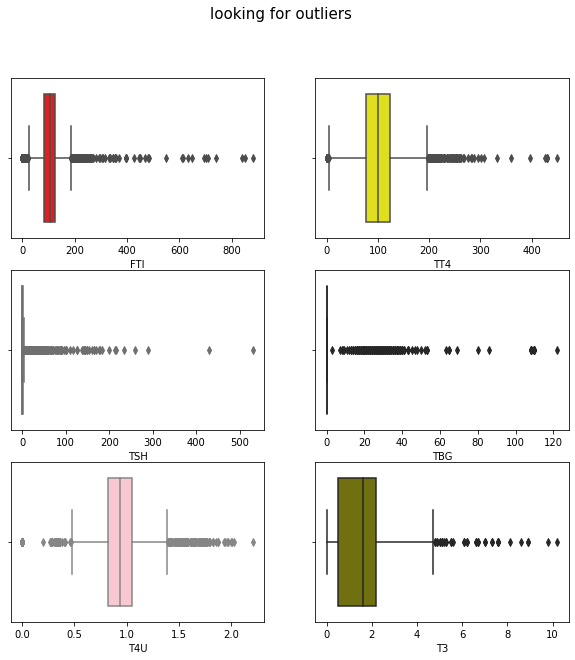

In [ ]:
### looking for outliers
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(10,10))
plt.suptitle('looking for outliers',fontsize=(15))
sns.boxplot(data['FTI'],ax=ax1,color='red')
sns.boxplot(data['TT4'],ax=ax2,color='yellow')
sns.boxplot(data['TSH'],ax=ax3,color='skyblue')
sns.boxplot(data['TBG'],ax=ax4,color='green')
sns.boxplot(data['T4U'],ax=ax5,color='pink')
sns.boxplot(data['T3'],ax=ax6,color='olive')
plt.show()

In [ ]:
#### q1 and q3
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1


In [ ]:
### printing out the specific outliers per column
print(IQR)

age    37.00
TSH     1.80
T3      1.70
TT4    48.00
T4U     0.23
FTI    41.00
TBG     0.00
dtype: float64


In [ ]:
## removing the outliers
data=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]
data.shape

(3163, 23)

In [ ]:
#### Finally a cleaning the data
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,false,false,false,false,false,false,false,false,false,false,false,yes,30.0,yes,0.6,yes,15.0,yes,1.48,yes,10.0,no,0.0
1,hypothyroid,15,F,true,false,false,false,false,false,false,false,false,false,false,yes,145.0,yes,1.7,yes,19.0,yes,1.13,yes,17.0,no,0.0
2,hypothyroid,24,M,false,false,false,false,false,false,false,false,false,false,false,yes,0.0,yes,0.2,yes,4.0,yes,1.00,yes,0.0,no,0.0
3,hypothyroid,24,F,false,false,false,false,false,false,false,false,false,false,false,yes,430.0,yes,0.4,yes,6.0,yes,1.04,yes,6.0,no,0.0
4,hypothyroid,77,M,false,false,false,false,false,false,false,false,false,false,false,yes,7.3,yes,1.2,yes,57.0,yes,1.28,yes,44.0,no,0.0


# Exploratory data analysis

In [ ]:
## descriptive statistics
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,43.941195,5.046782,1.513531,100.281031,0.901502,106.386310,2.571483
std,25.235169,22.160083,1.191836,52.588757,0.341286,65.607474,10.204298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.500000,76.000000,0.820000,85.000000,0.000000
50%,48.000000,0.400000,1.600000,100.000000,0.940000,105.000000,0.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

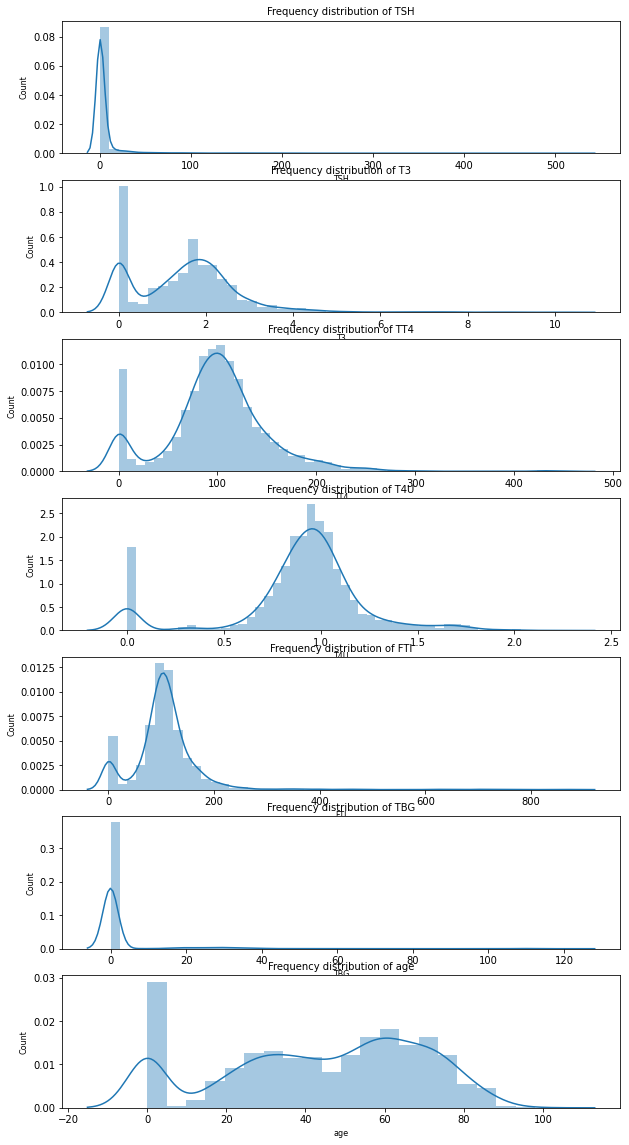

In [ ]:
###  frequency plots
col_names = ['TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG','age']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()


In [ ]:
### finding mode,median,kurtosis, and skewness
col_names = ['TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG','age']
for i in col_names:
  median=data[col_names].median()
  skewness=data[col_names].skew()
  kurtosis=data[col_names].kurt()
  mode=data[col_names].mode()
  print('median:',median)

  print('skewness:',skewness)

  print('kurtosis:',kurtosis)

  print('mode',mode)

  break

    
   

median: TSH      0.40
T3       1.60
TT4    100.00
T4U      0.94
FTI    105.00
TBG      0.00
age     48.00
dtype: float64
skewness: TSH    11.041893
T3      1.139446
TT4     0.693852
T4U    -0.914779
FTI     3.633281
TBG     5.824465
age    -0.356590
dtype: float64
kurtosis: TSH    178.553139
T3       4.457922
TT4      3.873765
T4U      2.320298
FTI     32.531517
TBG     45.891858
age     -0.923346
dtype: float64
mode    TSH   T3  TT4  T4U  FTI  TBG  age
0  0.0  0.0  0.0  0.0  0.0  0.0    0


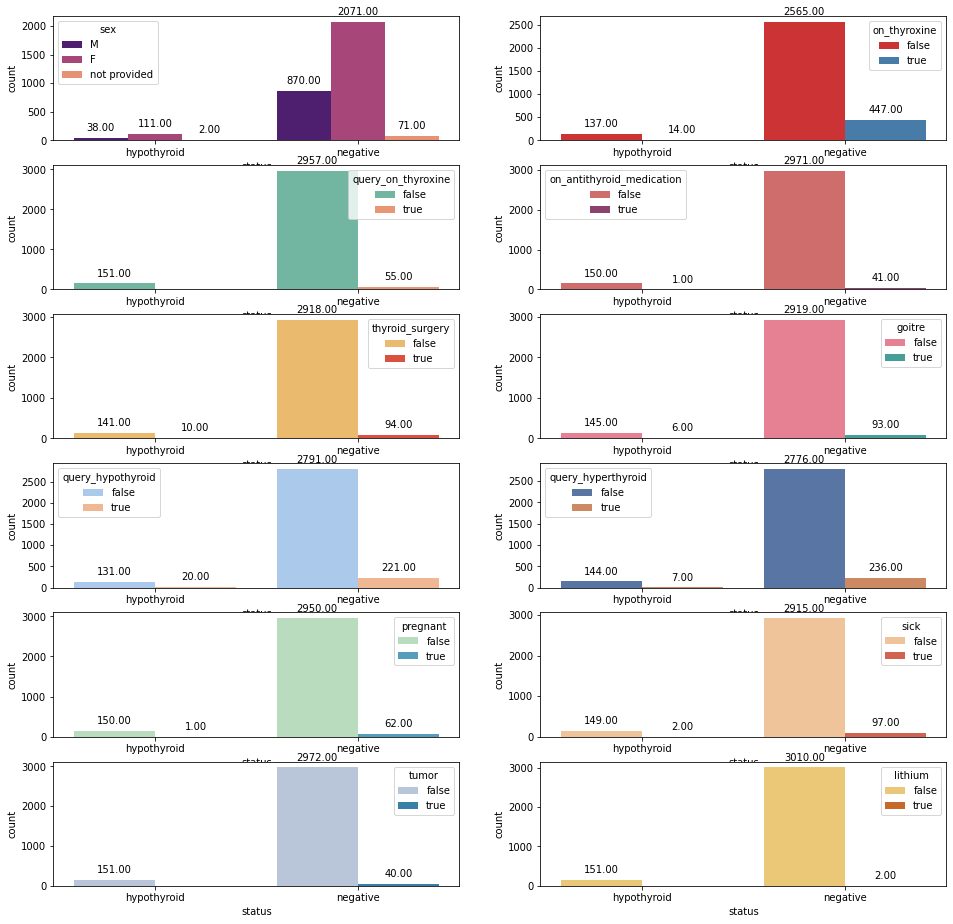

In [ ]:
## subplots to show count
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12))=plt.subplots(6,2,figsize=(16,16))
sns.countplot('status',hue='sex',data=data,palette='magma',ax=ax1)
sns.countplot('status',hue='on_thyroxine',data=data,palette='Set1',ax=ax2)
sns.countplot('status',hue='query_on_thyroxine',data=data,palette='Set2',ax=ax3)
sns.countplot('status',hue='on_antithyroid_medication',data=data,palette='flare',ax=ax4)
sns.countplot('status',hue='thyroid_surgery',data=data,palette='YlOrRd',ax=ax5)
sns.countplot('status',hue='goitre',data=data,palette='husl',ax=ax6)
sns.countplot('status',hue='query_hypothyroid',data=data,palette='pastel',ax=ax7)
sns.countplot('status',hue='query_hyperthyroid',data=data,palette='deep',ax=ax8)
sns.countplot('status',hue='pregnant',data=data,palette='GnBu',ax=ax9)
sns.countplot('status',hue='sick',data=data,palette='OrRd',ax=ax10)
sns.countplot('status',hue='tumor',data=data,palette='PuBu',ax=ax11)
sns.countplot('status',hue='lithium',data=data,palette='YlOrBr',ax=ax12)
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
  ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax3.patches:
  ax3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax4.patches:
  ax4.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax5.patches:
  ax5.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax6.patches:
  ax6.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax7.patches:
  ax7.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax8.patches:
  ax8.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax9.patches:
  ax9.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax10.patches:
  ax10.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax11.patches:
  ax11.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax12.patches:
  ax12.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')


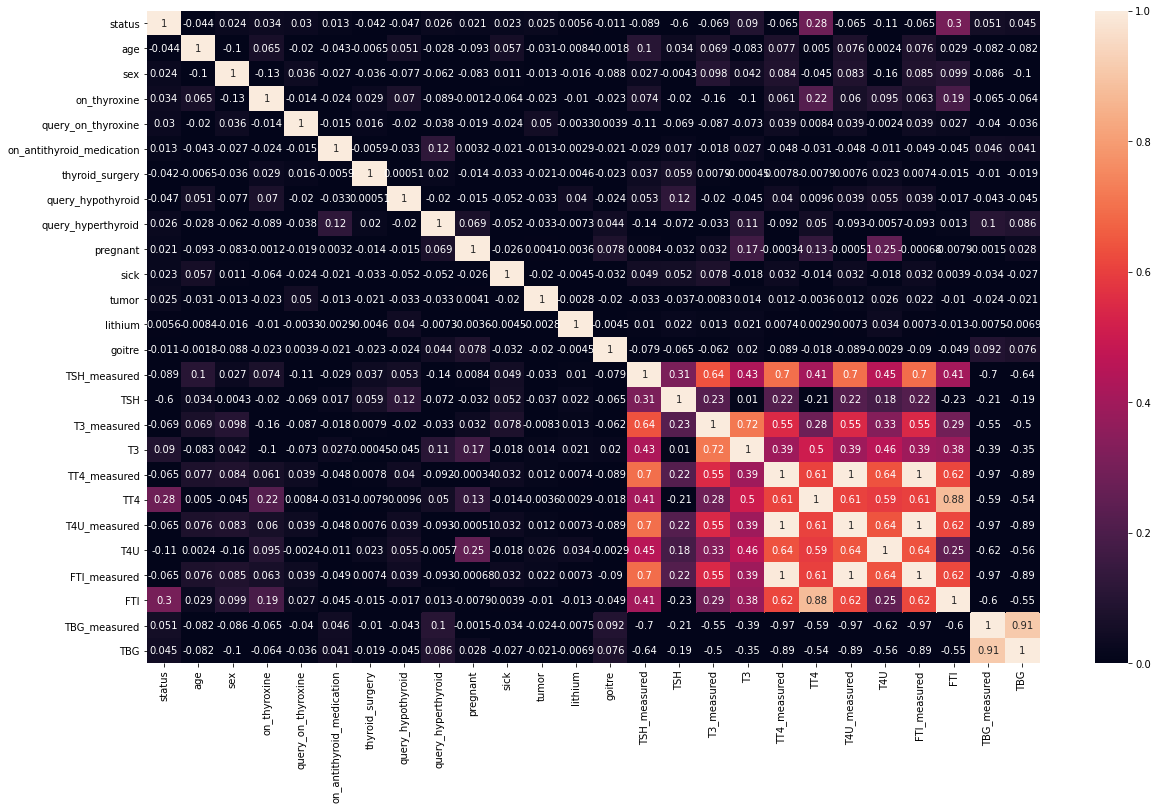

In [ ]:
### doing the  correlation of the data
## encoding the data
ll=LabelEncoder()
df=pd.DataFrame()
for i in data.columns:
  df[i]=ll.fit_transform(data[i])
df.head()
### correlation
fig,plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=0)

# Predictive Analysis

In [114]:
#### split the data the data into features and label
y=np.array(df['status'])
features_list=df.drop('status',1).columns
x=np.array(df.drop('status',1))

In [115]:
#### normalization
ss=StandardScaler()
x=ss.fit_transform(x)

In [116]:
### splitting the data training and test set
fold=KFold(n_splits=5)
count=1
for train_index,test_index in fold.split(x):
  print('training model',count)
x_train,x_test=x[train_index],x[test_index]
y_train,y_test=y[train_index],y[test_index]

training model 1
training model 1
training model 1
training model 1
training model 1


## Random forest

In [122]:
### random forest
msitu=RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=2,min_samples_leaf=1,verbose=1)
forest=msitu.fit(x_train,y_train)
forest

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [118]:
### predict
y_pred=msitu.predict(x_test)
### checking the prediction
pd.DataFrame({'actual':y_test.flatten(),'predicted':y_pred.flatten()})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
627,1,1
628,1,1
629,1,1
630,1,1


In [119]:
### checking the performance
print('accuracy:-',accuracy_score(y_test,y_pred))
print('MSE:-',mean_squared_error(y_test,y_pred))

accuracy:- 0.9936708860759493
MSE:- 0.006329113924050633


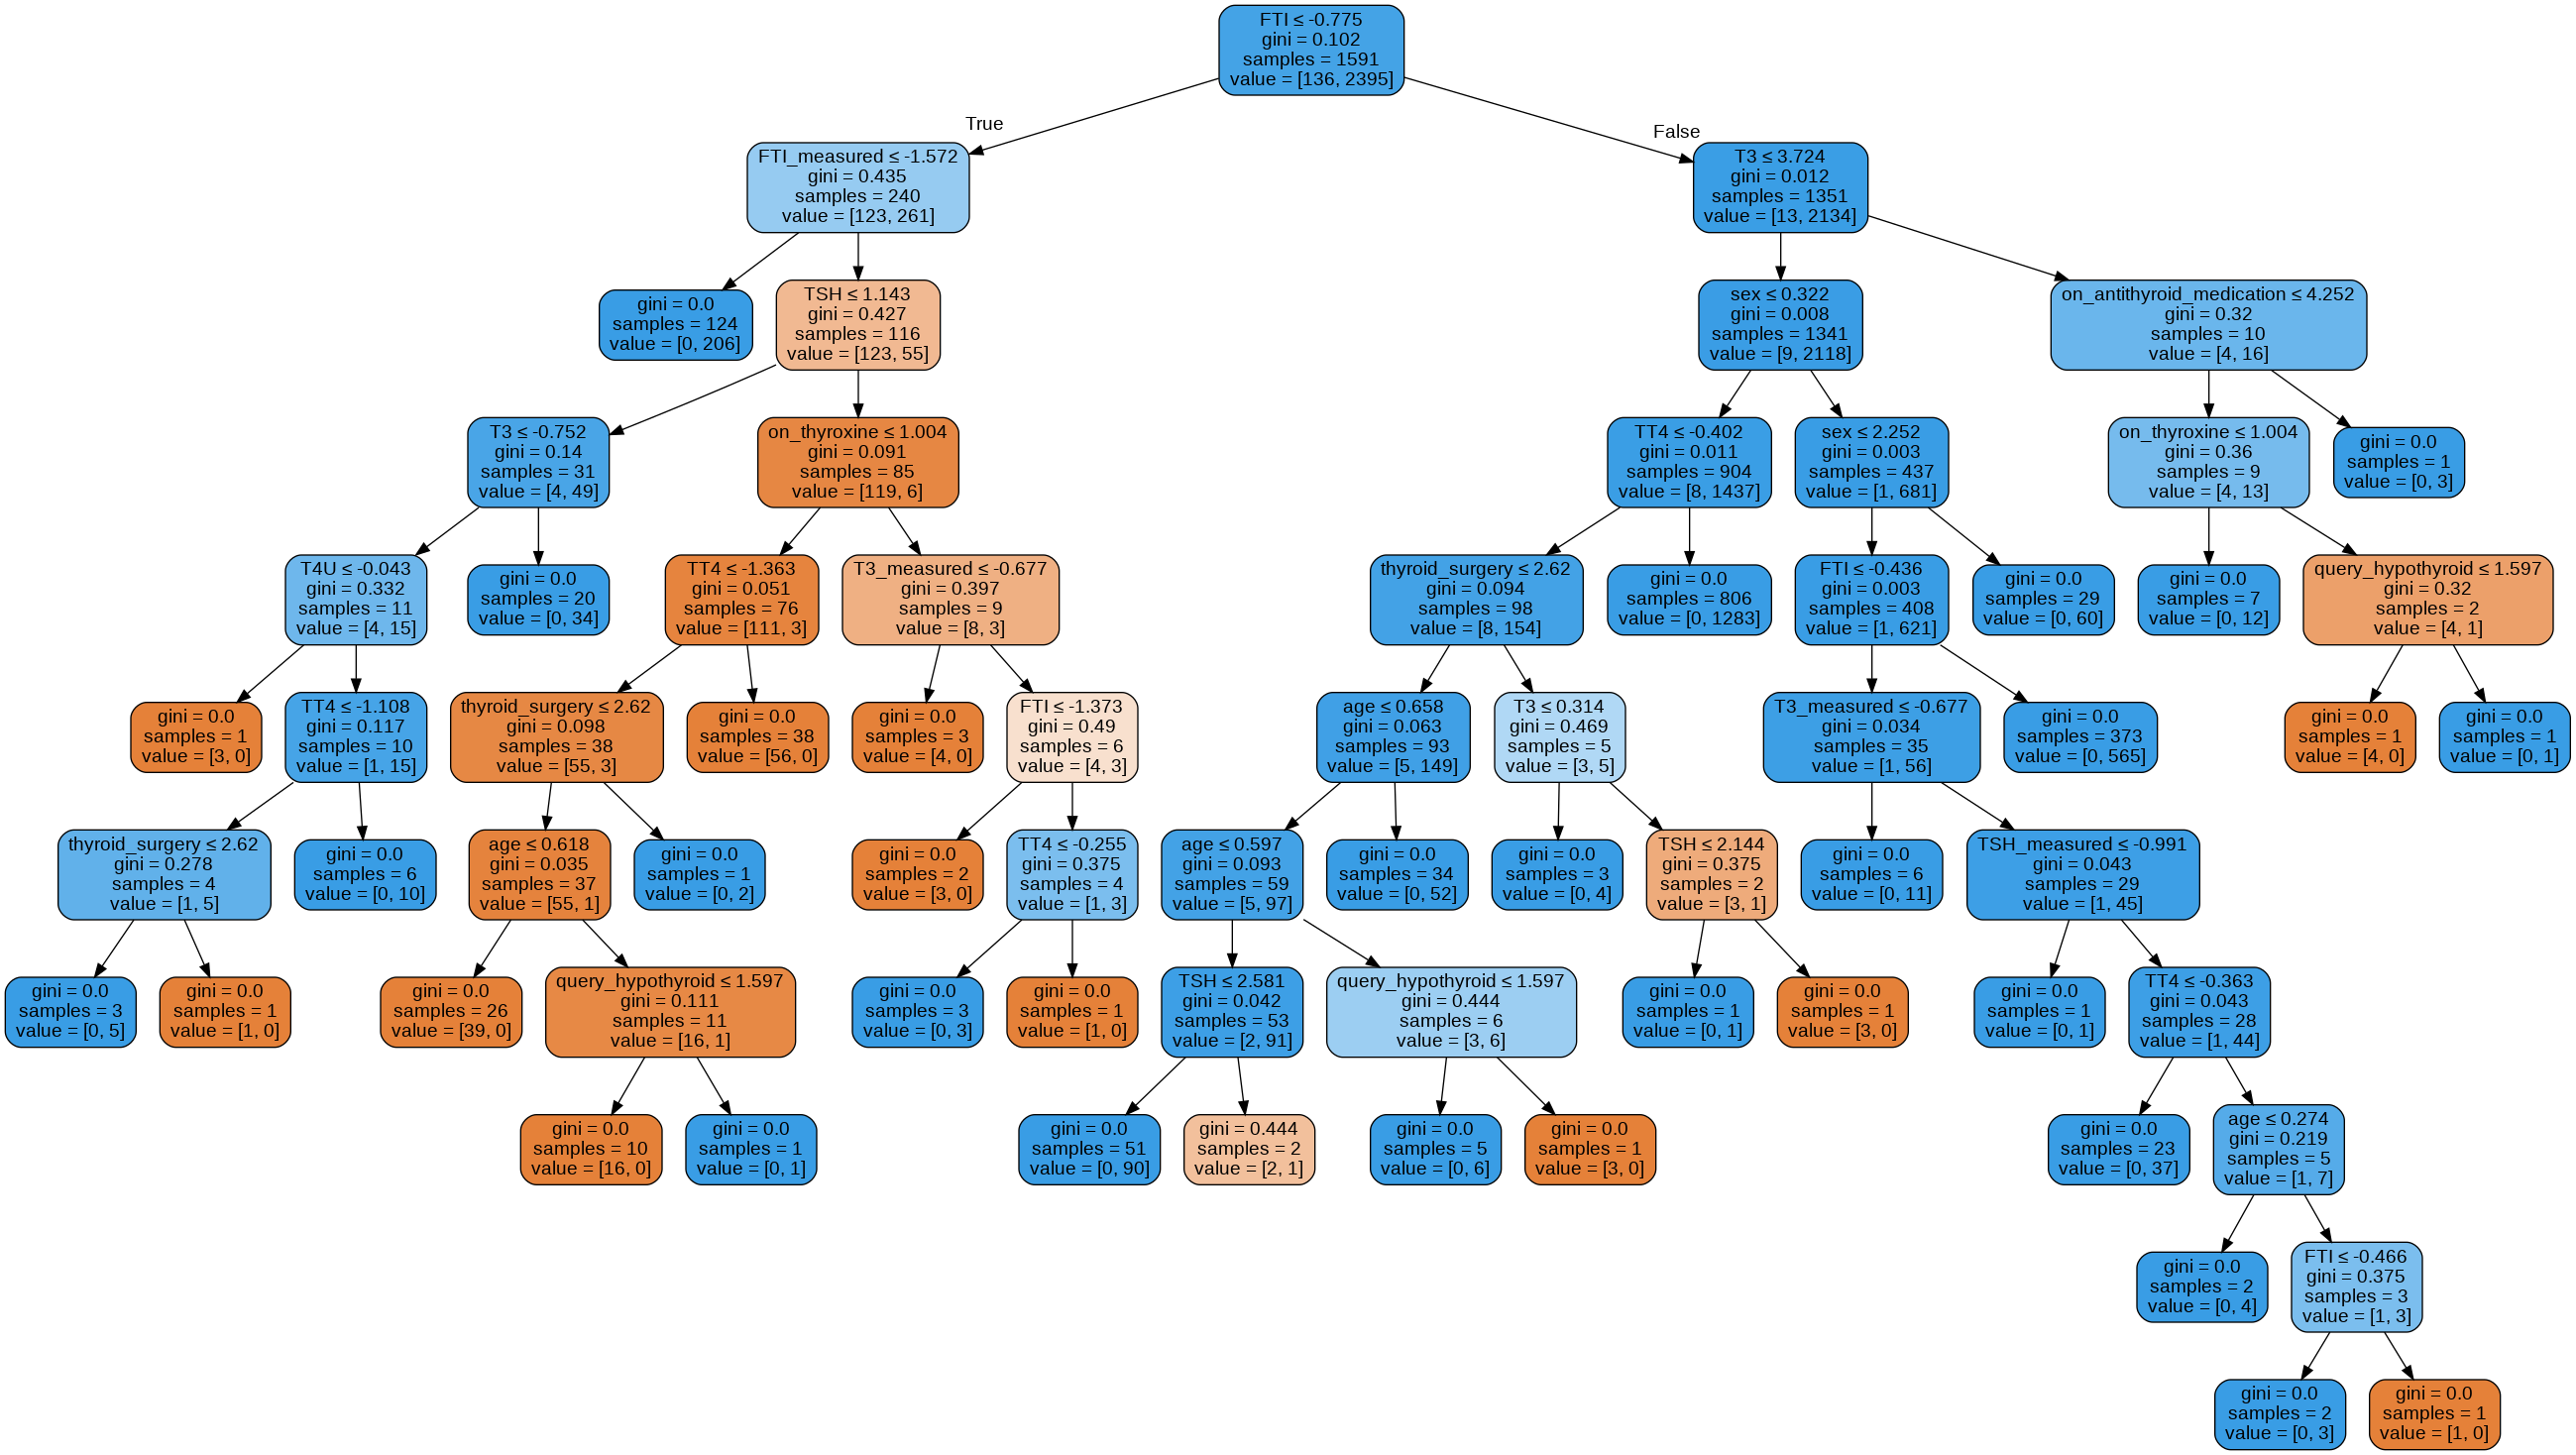

In [111]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = msitu.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_list)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mti.png')
Image(graph.create_png())

Our  Random forest had a very high accuracy of 99.3%, considering this is a medical prediction, a high accuracy is paramount to avoid any error that can lead to mis-diagonosis.
From a our tree we can see FTI measured  was our Root node, with a gini score of 0.102 which is very small. 
From the root node  1500 samples were tested and 136 were positive..


## GradientBoosting Classifer

In [131]:
## fitting
gb=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.8,max_depth=5,min_samples_split=2,min_samples_leaf=1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.8, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [134]:
#### predicting
y_pred=gb.predict(x_test)
pd.DataFrame({'actual':y_test.flatten(),'predicted':y_pred.flatten()})

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
627,1,1
628,1,1
629,1,1
630,1,1


In [135]:
#### checking the accuracy
print('accuracy:-',accuracy_score(y_test,y_pred))
print('MSE:-',mean_squared_error(y_test,y_pred))

accuracy:- 0.9936708860759493
MSE:- 0.006329113924050633


The Gradient boosting classifer had an accuracy score of 99.37% same with the random forest

## Support Vector machine

In [142]:
### polynomial SVM
poly=SVC(kernel='poly',gamma='auto',degree=3)
poly.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
## predicting
y_pred=poly.predict(x_test)
pd.DataFrame({'actual':y_test.flatten(),'predict':y_pred.flatten()})

,actual,predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
627,1,1
628,1,1
629,1,1
630,1,1


In [148]:
###3 checking the accuracy of the model
print('accuracy:-',accuracy_score(y_test,y_pred))
print('MSE:-',mean_squared_error(y_test,y_pred))

accuracy:- 0.995253164556962
MSE:- 0.004746835443037975


In [150]:
###Fitting the model: Radial basis function (rbf)
rbf=SVC(kernel='rbf',degree=2,gamma='auto')
rbf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
####predicting
y_pred=rbf.predict(x_test)
pd.DataFrame({'actual':y_test.flatten(),'predict':y_pred.flatten()})

,actual,predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
627,1,1
628,1,1
629,1,1
630,1,1


In [152]:
### accuracy
print('accuracy:-',accuracy_score(y_test,y_pred))
print('MSE:-',mean_squared_error(y_test,y_pred))

accuracy:- 0.9936708860759493
MSE:- 0.006329113924050633


In [156]:
### fitting linear
linear=SVC(kernel='linear',gamma='auto',degree=3)
linear.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
##predict
y_pred=linear.predict(x_test)

In [158]:
### accuracy
print('accuracy:-',accuracy_score(y_test,y_pred))
print('MSE:-',mean_squared_error(y_test,y_pred))

accuracy:- 0.9920886075949367
MSE:- 0.007911392405063292


# **Challenging the solution**

Below is the summary of the accuracy scores for the models investigated in this analysis:

Random forest - 99.37%

Gradient boosting classifer - 99.37%

SVM(polynomial) -99.56%

SVM(linear) - 99.21%

SVM(rbf) - 99.37%

From the above we can see that SVM polynomial had the highest accuracy, although  all the models had a very ahigh accuracy. I would recommend we use any of the above models since 99% is a high Accuracy for any model.

# Follow-up Questions

## a) Did we have the right data?

Yes we had: the data provided all the necessary information to classify a patient sick or not

## b)Do we need other data to answer the research question

Yes, since this is a medical research more samples would help improve our model, and help it learn more, three thousand samples are not enough

## c) Did we have the right question?

The research question was sufficient and helped to hit the objective of the analysis